# Introduction

This project will be looking at mushroom data donated to the UCI machine learning repository.

Mushroom. (1987). UCI Machine Learning Repository. https://doi.org/10.24432/C5959T.

This project will analyze, visualize, and clean the data to help get a better understanding about the data. Afterwards the data will be prepared for a machine learning model to answer a question. 

## Project goals

The goal of this project is to determine, given the physical characteristics of a mushroom, whether a mushroom is edible or poisonous. Unfortunately, there is no simple rule in determining if a mushroom is edible or not and without pior knowledge of mushrooms, it would be difficult for one to make an accurate decision.

So, with the physical characteristics of a mushroom, is it possible to determine if it is edible or poisonous?  

## Data

This project is using one dataset, "agaricus-lepiota.data", which consists of samples of 23 gilled mushroom species belonging to the Agaricus and Lepiota families.

In this project, data visualization will be used to help familiarize and understand each variable in the dataset. The data will be cleaned and prepped for a model. This project will be using the support vector machine model. The model will be evauluated on accuracy, precision, recall, and f1 score.  

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## Exploring the data

Loading in the data and converted the file to a CSV so it could be loading in a DataFrame called "mushrooms". Viewing the first five rows, it shows the columns and their values are simplified to just letters, making it hard to understand what the data is telling us. 

In [2]:
file_path = r'C:\Users\Cedric\Downloads\mushroom\agaricus-lepiota.data'

mushrooms = pd.read_csv(file_path, delimiter = ',')
mushrooms.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [3]:
list(mushrooms.columns)

['p',
 'x',
 's',
 'n',
 't',
 'p.1',
 'f',
 'c',
 'n.1',
 'k',
 'e',
 'e.1',
 's.1',
 's.2',
 'w',
 'w.1',
 'p.2',
 'w.2',
 'o',
 'p.3',
 'k.1',
 's.3',
 'u']

Here the columns are renamed to help better understand what is being looked at. The values of each column will stay the same due to the fact that they are all categorical variables and will need to be transformed in order to be read by the model later on. The values will be discussed while looking at each of the variables. 

In [4]:
mushrooms.columns = ['poisonous', 'cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor', 'gill_attachment',
                    'gill_spacing', 'gill_size', 'gill_color', 'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
                    'stalk_surface_below_ring', 'stalk_color_above_ring', 'stalk_color_below_ring', 'veil_type',
                    'veil_color', 'ring_number', 'ring_type', 'spore_print_color', 'population', 'habitat']

In [5]:
list(mushrooms.columns)

['poisonous',
 'cap_shape',
 'cap_surface',
 'cap_color',
 'bruises',
 'odor',
 'gill_attachment',
 'gill_spacing',
 'gill_size',
 'gill_color',
 'stalk_shape',
 'stalk_root',
 'stalk_surface_above_ring',
 'stalk_surface_below_ring',
 'stalk_color_above_ring',
 'stalk_color_below_ring',
 'veil_type',
 'veil_color',
 'ring_number',
 'ring_type',
 'spore_print_color',
 'population',
 'habitat']

### Poisonous

- e = edible
- p = poisonous

Count of edible and poisonous mushrooms. ~4200 edible mushrooms and ~3900 poisonous mushrooms.

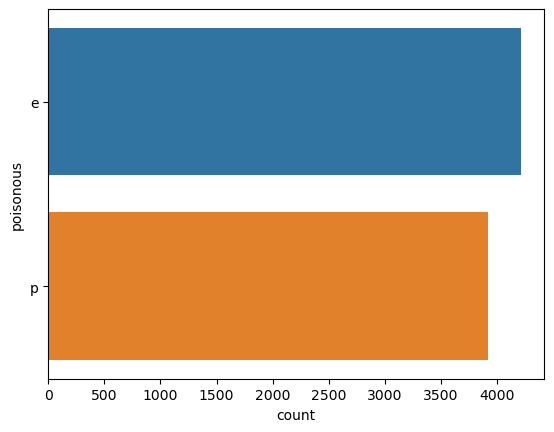

In [6]:
sns.countplot(data = mushrooms, y = 'poisonous');

### Cap shape

- x = convex
- b = bell
- s = sunken
- f = flat
- k = knobbed
- c = conical

The different shapes of the caps on mushrooms. It appears convex and flat shaped mushroom caps are most common, while conical and sunken shaped are not so common with only 36 mushrooms between them.

In [7]:
mushrooms.cap_shape.value_counts()

x    3655
f    3152
k     828
b     452
s      32
c       4
Name: cap_shape, dtype: int64

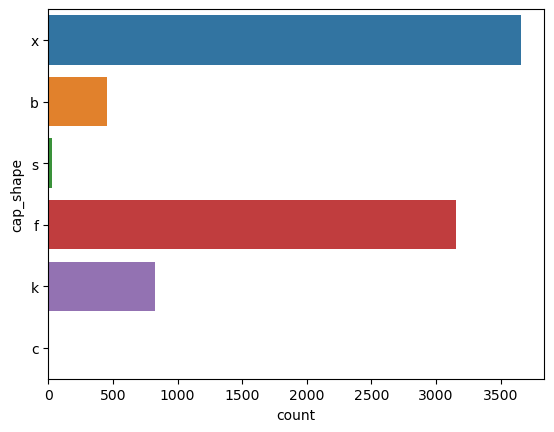

In [8]:
sns.countplot(data = mushrooms, y = 'cap_shape');

### Cap surface

- s = smooth
- y = scaly
- f = fibrous
- g = grooves

Description of cap surfaces. Most mushrooms in this dataset either have a scaly, smooth, or fibrous surface. Very little have grooves.

In [9]:
mushrooms.cap_surface.value_counts()

y    3244
s    2555
f    2320
g       4
Name: cap_surface, dtype: int64

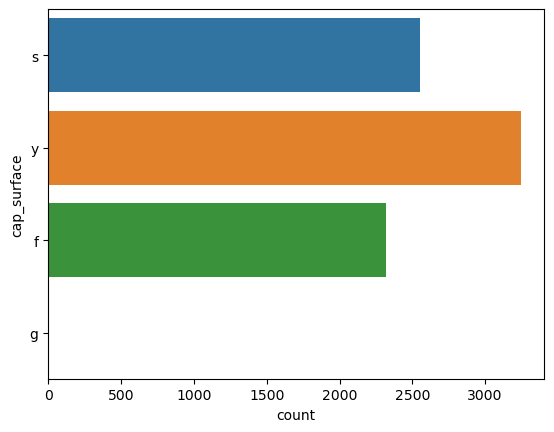

In [10]:
sns.countplot(data = mushrooms, y = 'cap_surface');

### Cap color

- y = yellow
- w = white
- g = gray
- n = brown
- e = red
- p = pink
- b = buff
- u = purple
- c = cinnamon
- r = green

A graph of the different colors of mushroom caps. It appears most mushrooms are brown, gray, or red.

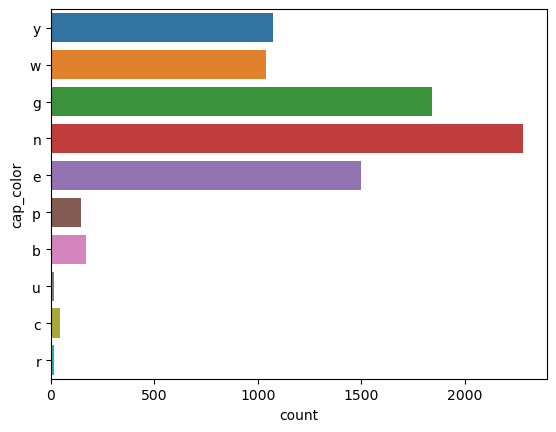

In [11]:
sns.countplot(data = mushrooms, y = 'cap_color');

Here is the same graph, but put against the poisonous variable. It seems there are more mushrooms with brown, gray, or white caps that are edible rather than poisonous and there are more mushrooms with red, yellow, pink, or buff caps that are poisonous rather than edible. Purple and green caps showing only edible with very little samples. This shows there is no simple rule in determining a mushrooms edibility.

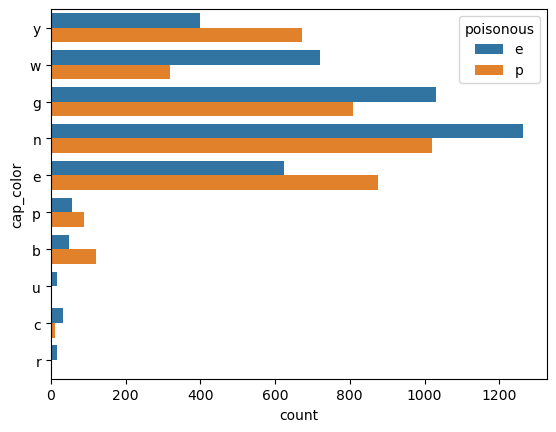

In [12]:
sns.countplot(data = mushrooms, y = 'cap_color', hue = 'poisonous');

Count of cap color vs poisonous.

In [13]:
mushrooms.groupby('cap_color').poisonous.value_counts()

cap_color  poisonous
b          p             120
           e              48
c          e              32
           p              12
e          p             876
           e             624
g          e            1032
           p             808
n          e            1264
           p            1019
p          p              88
           e              56
r          e              16
u          e              16
w          e             720
           p             320
y          p             672
           e             400
Name: poisonous, dtype: int64

### Bruises

- t = bruises
- f = no bruises

It appears ~3300 mushrooms have bruises and ~4700 mushrooms do not.

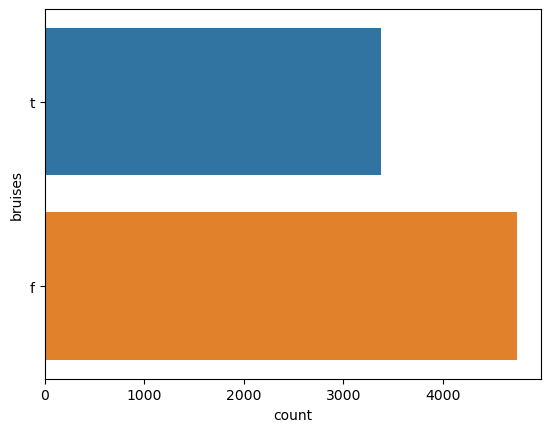

In [14]:
sns.countplot(data = mushrooms, y = 'bruises');

### Odor

- a = almond
- i = anise
- p = pungent
- n = none
- f = foul
- c = creosote
- y = fishy
- s = spicy
- m = musty

A graph of the different odors of mushrooms. Most mushrooms in this dataset either don't have an odor or has a foul odor.

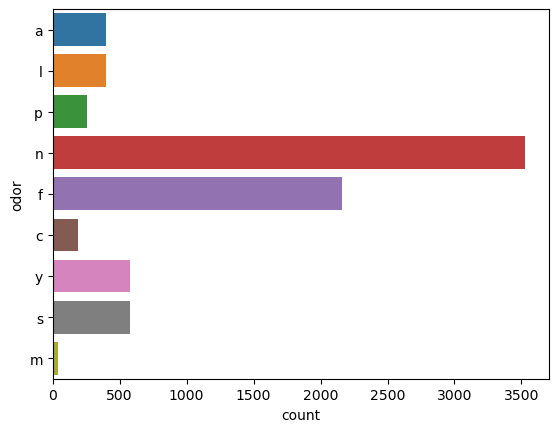

In [15]:
sns.countplot(data = mushrooms, y = 'odor');

Below is the same graph, but like with the cap colors, it's put against the poisonous variable. It shows very clearly which odors are connected to edible or poisonous mushrooms. Looks like the odor "none" is the only odor showing having edible and poisonous mushrooms with the majority of the mushrooms being edible. 

This is a very important factor to consider when determining edibility! 

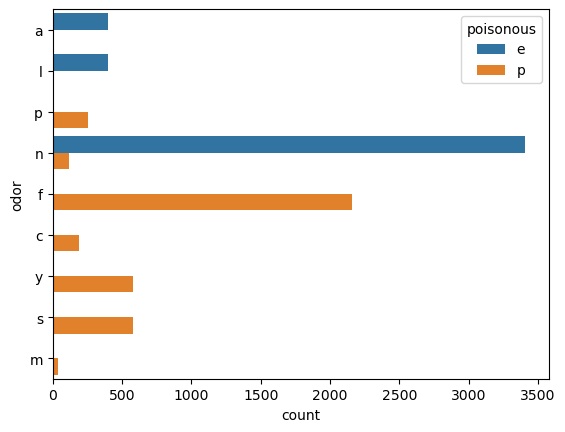

In [16]:
sns.countplot(data = mushrooms, y = 'odor', hue = 'poisonous');

Count of odor vs poisonous.

In [17]:
print(mushrooms.groupby('odor').poisonous.value_counts())

odor  poisonous
a     e             400
c     p             192
f     p            2160
l     e             400
m     p              36
n     e            3408
      p             120
p     p             255
s     p             576
y     p             576
Name: poisonous, dtype: int64


### Gill attachment

- f = free
- a = attached

Most of the mushrooms in the dataset have free gill attachment.

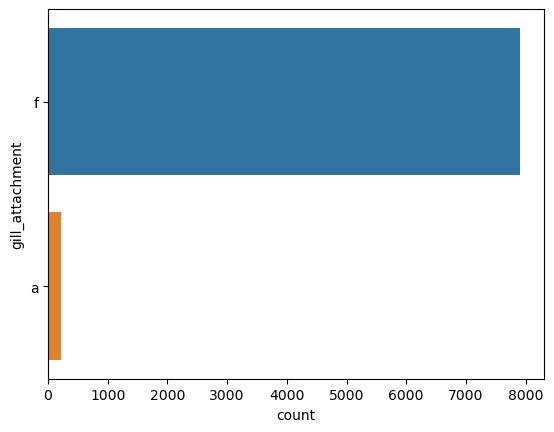

In [18]:
sns.countplot(data = mushrooms, y = 'gill_attachment');

### Gill spacing

- c = close
- w = crowded

Most mushrooms have closed gill spacing.

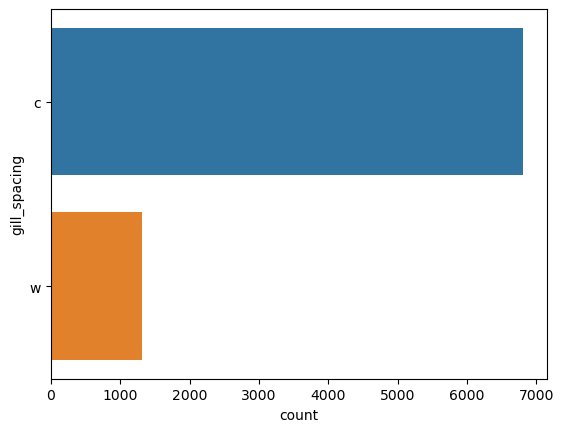

In [19]:
sns.countplot(data = mushrooms, y = 'gill_spacing');

### Gill size

- b = broad
- n = narrow

It appears most mushrooms gill sizes are broad.

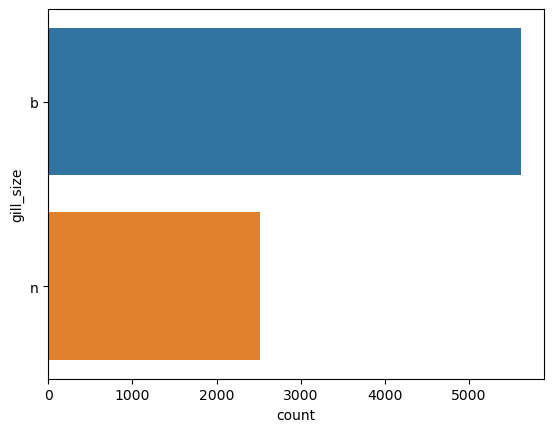

In [20]:
sns.countplot(data = mushrooms, y = 'gill_size');

### Gill color

- k = black
- n = brown
- g = gray
- p = pink
- w = white
- h = chocolate
- u = purple
- e = red
- b = buff
- r = green
- y = yellow
- o = orange

A graph of the different gill colors. The most common colors being buff, pink, white, and brown.

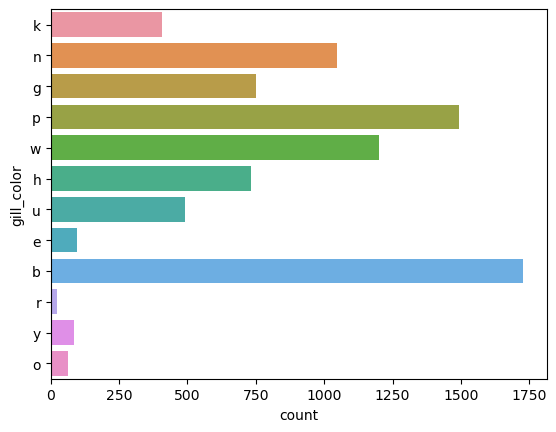

In [21]:
sns.countplot(data = mushrooms, y = 'gill_color');

The same graph put against poisonous. Most of the colors seem mixed between edible and poisonous except for a few. Buff color gills have 1728 mushrooms that are only poisonous! Red and orange gills have only edible but not as many samples. Green gills show only poisonous with very little samples.

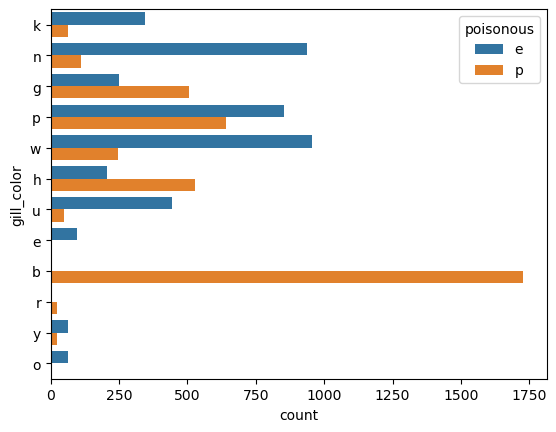

In [22]:
sns.countplot(data = mushrooms, y = 'gill_color', hue = 'poisonous');

Count of gill color vs poisonous.

In [23]:
mushrooms.groupby('gill_color').poisonous.value_counts()

gill_color  poisonous
b           p            1728
e           e              96
g           p             504
            e             248
h           p             528
            e             204
k           e             344
            p              63
n           e             936
            p             112
o           e              64
p           e             852
            p             640
r           p              24
u           e             444
            p              48
w           e             956
            p             246
y           e              64
            p              22
Name: poisonous, dtype: int64

### Stalk shape

- e = enlarging
- t = tapering

Stalk shape of mushrooms. majority having a tapering shape. 

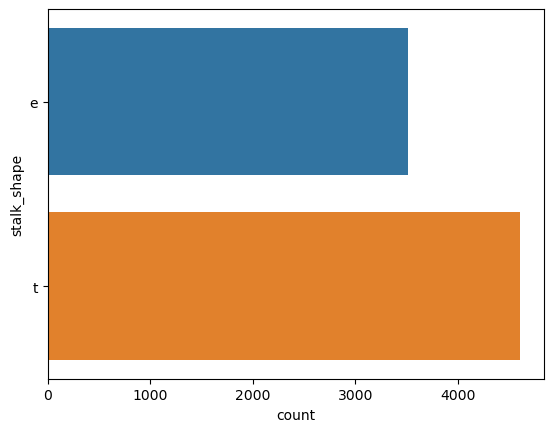

In [24]:
sns.countplot(data = mushrooms, y = 'stalk_shape');

### Stalk root

- c = club
- e = equal
- b = bulbous
- r = rooted
- ? = missing

The different stalk root shapes. The majority of mushrooms have balbous roots. 

This graph also reveals that there is missing data. ~2500 mushrooms in the dataset are missing stalk root data. The other file provided with the dataset shows there are six stalk characteristics for identifying mushrooms: clubed shape, equal, bulbous, rooted, with cup , and rhizomorphs. This dataset shows entries for four out of the six characteristics. There is no way to know for sure what the missing data could be and the rows with the missing data can't be dropped, that would remove ~30% of the dataset. The only way to deal with this would be to drop the column containing stalk root data entirely. 

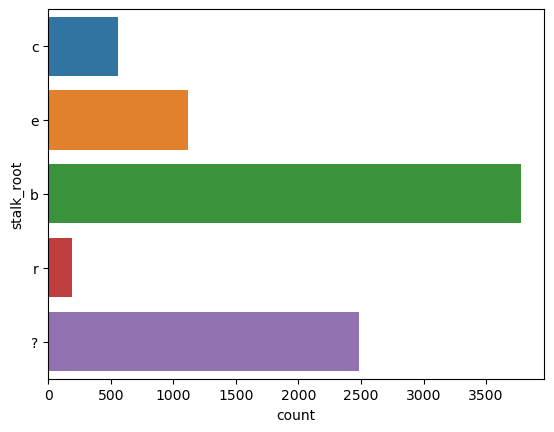

In [25]:
sns.countplot(data = mushrooms, y = 'stalk_root');

### Stalk surface above ring

- s = smooth
- f = fibrous
- k = silky
- y = scaly

It seems most stalk surfaces are smooth or silky above the ring.

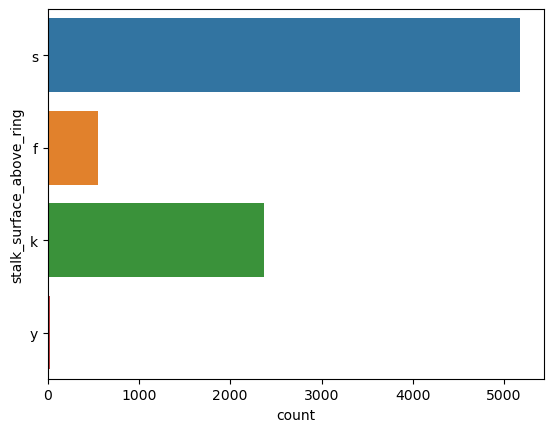

In [26]:
sns.countplot(data = mushrooms, y = 'stalk_surface_above_ring');

### Stalk surface below ring

- s = smooth 
- f = fibrous
- y = scaly
- k = silky

Like with above the ring, most mushrooms stalk surfaces below the ring are smooth or silky.

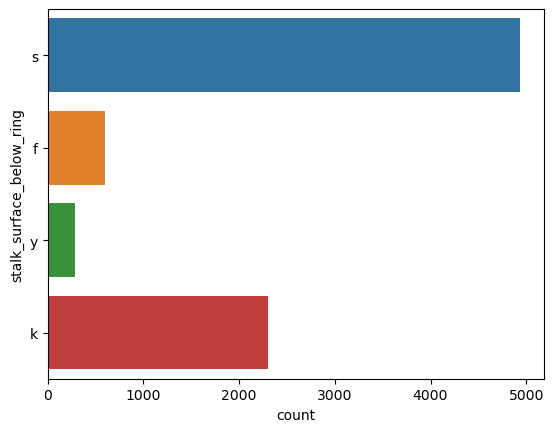

In [27]:
sns.countplot(data = mushrooms, y = 'stalk_surface_below_ring');

### Stalk color above ring

- w = white
- g = gray
- p = pink
- n = brown
- b = buff 
- e = red
- o = orange
- c = cinnamon
- y = yellow

The majority of mushrooms have a white or pink stock above the ring.

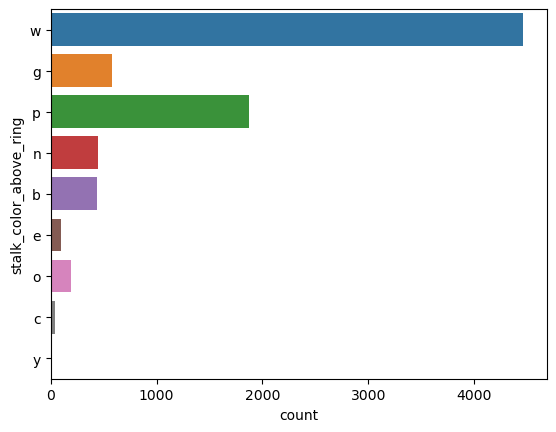

In [28]:
sns.countplot(data = mushrooms, y = 'stalk_color_above_ring');

### Stalk color below ring

- w = white
- p = pink
- g = gray 
- b = buff
- n = brown
- e = red
- y = yellow
- o = orange
- c = cinnamon

The same with above the ring, the most common stalk color below the ring is white and pink.

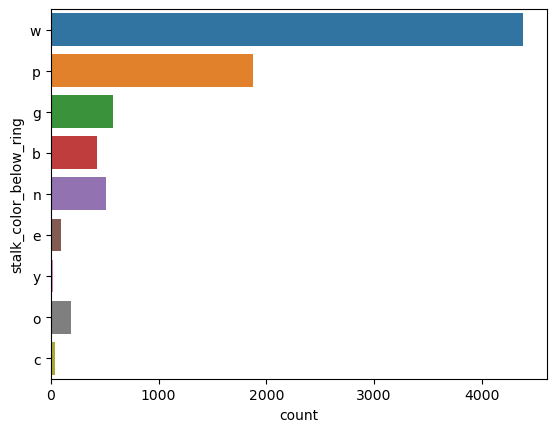

In [29]:
sns.countplot(data = mushrooms, y = 'stalk_color_below_ring');

### Veil type

- p = partial

There are two veil types: partial and universal. All of the mushrooms in this dataset have a partial veil type.

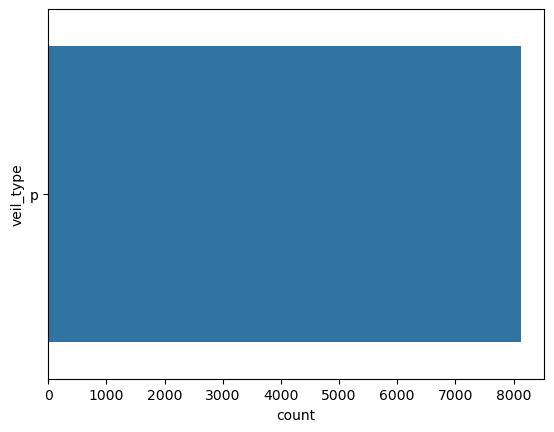

In [30]:
sns.countplot(data = mushrooms, y = 'veil_type');

### Veil color

- w = white
- n = brown
- o = orange
- y = yellow

The most common veil color is white.

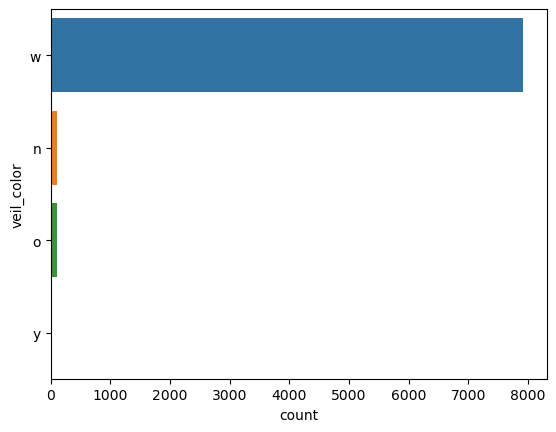

In [31]:
sns.countplot(data = mushrooms, y = 'veil_color');

### Ring number

- o = one
- t = two
- n = none

It appears most mushrooms only have one ring.

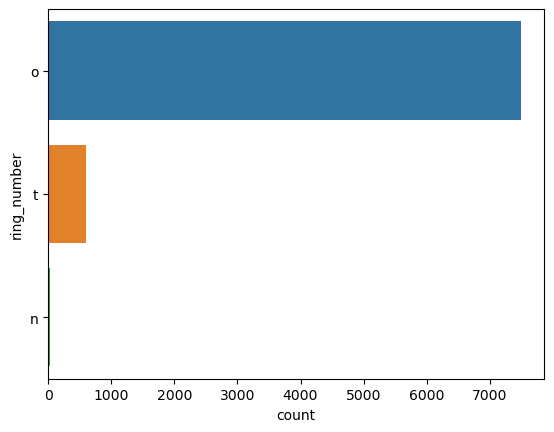

In [32]:
sns.countplot(data = mushrooms, y = 'ring_number');

### Ring type

- p = pendant
- e = evanescent
- l = large
- f = flaring
- n = none

The most common ring types of mushrooms in this dataset are pendant, evanescent and large.

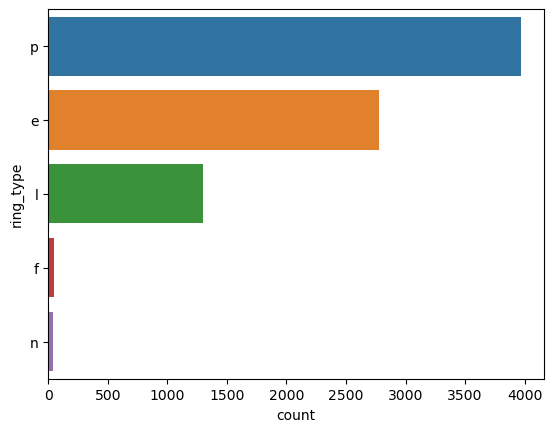

In [33]:
sns.countplot(data = mushrooms, y = 'ring_type');

### Spore print color

- n = brown
- k = black
- u = purple
- h = chocolate
- w = white
- r = green
- o = orange
- y = yellow 
- b = buff

It appears the most common spore print colors are white, brown, black, and chocolate.

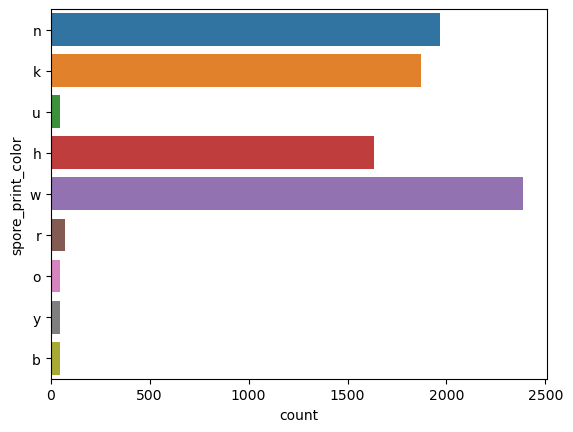

In [34]:
sns.countplot(data = mushrooms, y = 'spore_print_color');

### Population

- n = numerous
- s = scattered
- a = abundant
- v = several
- y = solitary
- c = clustered

A graph showing the population of mushrooms in the dataset in certain areas. It appears several is the most common.

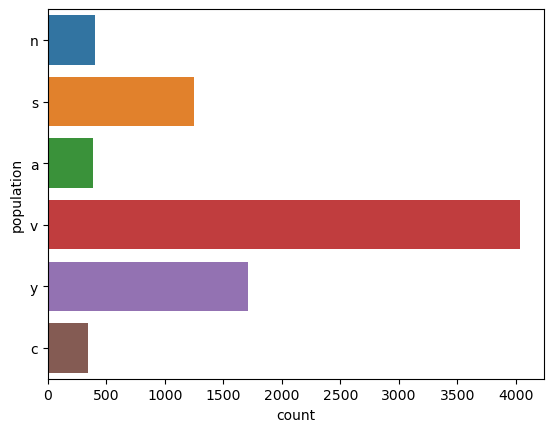

In [35]:
sns.countplot(data = mushrooms, y = 'population');

### Habitat

- g = grasses
- m = meadows
- u = urban
- d = woods
- p = paths 
- w = waste
- l = leaves

A graph showing the different habitats the mushrooms are found. It appears the most common habitats are the woods and grasses.

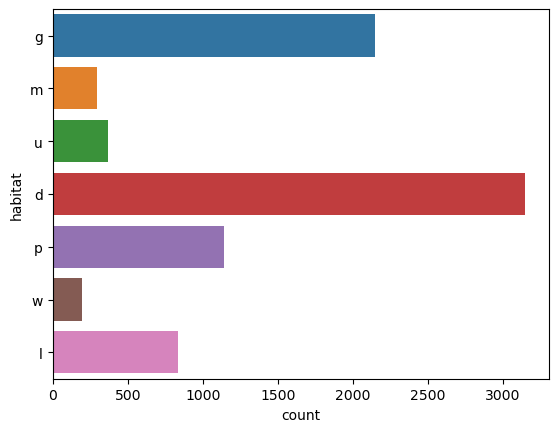

In [36]:
sns.countplot(data = mushrooms, y = 'habitat');

## Data preparation

Here the data will be checked for any more missing data. It was previously discovered that there was missing data in the 'stalk root' column. There is no way to know what the missing data could be. Removing the column as a feature would be the best way to deal with the missing data.

In [37]:
mushrooms[mushrooms.isnull().any(axis = 1)]

,poisonous,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat


In [38]:
 mushrooms = mushrooms.drop('stalk_root', axis = 1)

Next step is to transform the data for the model. first is to turn the labels in strings so they can be read in a dictionary to give them binary indentifiers. 'e' becomes 0 and 'p' becomes 1.

In [55]:
mushrooms.poisonous = mushrooms.poisonous.astype('string')
binary_dict = {'p':1, 'e':0}
mushrooms.poisonous = mushrooms.poisonous.map(binary_dict)
y

,poisonous
0,0
1,0
2,1
3,0
4,0
...,...
8118,0
8119,0
8120,0
8121,1


The features and labels are separated.

In [40]:
x = mushrooms.iloc[:, 1:]
y = mushrooms.iloc[:, 0:1]

The features are given binary indentifiers using dummy variables.

In [56]:
for column in x.columns:
    x = pd.get_dummies(x, columns = [column], prefix = [column])
x

,cap_shape_b_0,cap_shape_b_1,cap_shape_c_0,cap_shape_c_1,cap_shape_f_0,cap_shape_f_1,cap_shape_k_0,cap_shape_k_1,cap_shape_s_0,cap_shape_s_1,...,habitat_l_0,habitat_l_1,habitat_m_0,habitat_m_1,habitat_p_0,habitat_p_1,habitat_u_0,habitat_u_1,habitat_w_0,habitat_w_1
0,1,0,1,0,1,0,1,0,1,0,...,1,0,1,0,1,0,1,0,1,0
1,0,1,1,0,1,0,1,0,1,0,...,1,0,0,1,1,0,1,0,1,0
2,1,0,1,0,1,0,1,0,1,0,...,1,0,1,0,1,0,0,1,1,0
3,1,0,1,0,1,0,1,0,1,0,...,1,0,1,0,1,0,1,0,1,0
4,1,0,1,0,1,0,1,0,1,0,...,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,1,0,1,0,1,0,0,1,1,0,...,0,1,1,0,1,0,1,0,1,0
8119,1,0,1,0,1,0,1,0,1,0,...,0,1,1,0,1,0,1,0,1,0
8120,1,0,1,0,0,1,1,0,1,0,...,0,1,1,0,1,0,1,0,1,0
8121,1,0,1,0,1,0,0,1,1,0,...,0,1,1,0,1,0,1,0,1,0


After the features and labels have been transformed, they are ready to be split into training and test sets.

In [60]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .33, random_state = 42)
y_train = y_train.to_numpy().ravel()
y_test = y_test.to_numpy().ravel()

## Predictions

The support vector classififer model is loaded in as well as the classification report and confuison matrix that will be used to evaluate and visualize the models preformance. 

In [61]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
model = SVC().fit(x_train, y_train)

### Evaluation

Here the model makes a prediction on the test data. The classification report scores the actual values vs the predictions. The metrics the reports shows are:

- **Accuracy** - True Positives and True Negatives divided by total values
- **Precision** - True Positives divided by True Positives and False Negatives
- **Recall** - True Positives divided by the True Positives and False Positives
- **F1-score** - A blended score of precision and recall
- **Macro Avg** - The unweighted mean value of precision and recall
- **Weighted Avg** - The weighted mean value of preision and recall by the support values for each class
- **Support** - The number of observations in class to predict

The test data shows a score of 100%!

In [62]:
y_pred = model.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1392
           1       1.00      1.00      1.00      1289

    accuracy                           1.00      2681
   macro avg       1.00      1.00      1.00      2681
weighted avg       1.00      1.00      1.00      2681



A heat map is made of the confusion matrix of the actual values vs the predicted values. 

The map shows us that there are 1289 correctly predicted poisonous mushrooms, or the True Positives, and 1392 correctly predicted edible mushrooms, or True Negatives. The zeros on the map represent the False Positives and the False Negatives, meaning the model correctly predicted all of the mushrooms in the testset! 

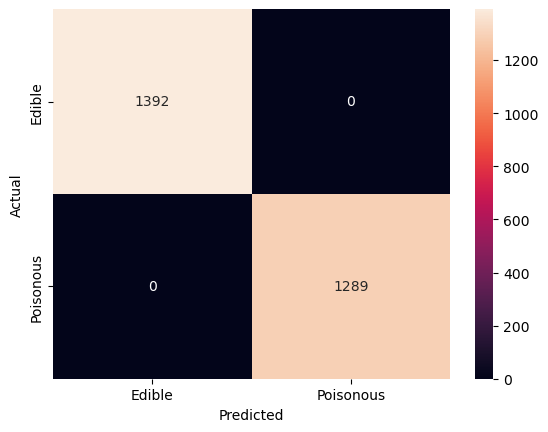

In [63]:
cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax, fmt = "d");

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.xaxis.set_ticklabels(['Edible', 'Poisonous']);
ax.yaxis.set_ticklabels(['Edible', 'Poisonous']);

# Conclusion

In this project, machine learing was used to predicted wheter a mushroom is edible or poisonous based on the mushrooms physical characteristics. There is no simple rule for determining if a mushroom is edible or not and without pior knowledge of mushrooms, it would be pretty difficult to make that determination.

Fortunately, a model was able to determine if a mushroom was edible or poisonous with 100% accuracy!

Next steps would be to determine if less features could be used to determine edibility with high accuracy. Also, to test and train the model on different types of mushrooms to make the model more powerful. 